# EDA of TRANSACT

In [1]:
# import packages
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import Error
import matplotlib.pyplot as plt

### Extract data from postgress

In [ ]:
# file name
transaction_file = "trans_data.csv"

In [ ]:
USER = "****"
PSWD = "****"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "everything2023"

In [ ]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

In [ ]:
# Read trnsact table
trans = pd.read_sql("select * from group_9.trnsact ORDER BY  random() limit 10000000", connection)

In [ ]:
# alter data types
trans['STORE'] = trans['STORE'].astype(int)
trans['REGISTER'] = trans['REGISTER'].astype(int)
trans['TRANNUM'] = trans['TRANNUM'].astype(int)
trans['SEQ'] = trans['SEQ'].astype(int)
trans['ORGPRICE'] = trans['ORGPRICE'].astype(float)
trans['SPRICE'] = trans['SPRICE'].astype(float)
trans['AMT'] = trans['AMT'].astype(float)
trans['INTERID'] = trans['INTERID'].astype(int)
trans['MIC'] = trans['MIC'].astype(int)
trans['QUANTITY'] = trans['QUANTITY'].astype(int)
trans['SALEDATE'] = pd.to_datetime(trans['SALEDATE'])

To save time, we extracted 10,000,000 data randomly from the trnsact database as a sample and save it as trans_data.csv

In [2]:
# load sample data
df = pd.read_csv(transaction_file).drop(["Unnamed: 0"],axis=1)
df

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknown
0,6454101,1103,220,1300,0,2004-10-22,R,1,5.0,5.00,5.00,946200029,34,0
1,9402188,8604,490,6500,501400705,2004-10-12,P,1,29.5,29.50,29.50,168600013,281,0
2,4631525,302,330,13600,11006608,2005-02-23,P,1,69.0,13.99,13.99,21100022,862,1
3,6364042,9309,490,2800,0,2005-07-21,P,1,1.5,1.50,1.50,835100018,282,0
4,491281,2109,70,700,167202300,2004-09-21,P,1,59.0,14.75,14.75,386600011,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,4112626,4707,60,12600,372501145,2005-04-16,P,1,27.0,27.00,27.00,426700018,281,0
9999996,2338437,3807,160,1900,0,2005-05-02,P,1,79.0,79.00,79.00,651600045,400,1
9999997,3554810,4307,180,300,0,2004-09-11,P,1,69.0,39.99,39.99,461900134,152,0
9999998,9511443,2909,210,1600,0,2005-02-17,P,1,59.0,14.75,14.75,909500010,862,0


Attribute Description:
1. SKU: Stock Keeping Unit number of the stock item
2. STORE: Store Number
3. REGISTER: Register Number of the current transaction 
4. TRANNUM: Transaction Code
5. SEQ: Sequence number
6. SALEDATE: Sale date of the item stock
7. STYPE: Type of the transaction (Return or Purchase
8. QUANTITY: Item quantity of the transaction
9. ORGPRICE: Original price of the item stock
10. SPRICE: Sale price of the item stock
11. AMT: Total amount of the transaction charge to the customer
12. INTERID: Internal ID
13. MIC: Master Item Code

In [3]:
# summary numeric items
df.describe()

,SKU,STORE,REGISTER,TRANNUM,SEQ,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknown
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,4.972531e+06,4.441205e+03,4.004123e+02,3.339001e+03,1.902679e+08,1.0,3.677917e+01,2.462192e+01,2.462192e+01,4.995113e+08,4.532060e+02,2.104620e-02
std,2.837289e+06,2.846282e+03,2.531104e+02,5.342919e+03,3.008186e+08,0.0,4.030042e+01,2.718583e+01,2.718583e+01,2.884888e+08,2.797995e+02,1.435384e-01
min,3.000000e+00,1.020000e+02,1.000000e+00,3.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00
25%,2.627616e+06,2.103000e+03,1.900000e+02,1.000000e+03,0.000000e+00,1.0,1.600000e+01,9.870000e+00,9.870000e+00,2.497000e+08,2.220000e+02,0.000000e+00
50%,4.857397e+06,4.103000e+03,3.700000e+02,2.200000e+03,0.000000e+00,1.0,2.800000e+01,1.800000e+01,1.800000e+01,4.992000e+08,4.000000e+02,0.000000e+00
75%,7.394258e+06,7.102000e+03,5.800000e+02,4.100000e+03,3.427072e+08,1.0,4.800000e+01,3.100000e+01,3.100000e+01,7.495001e+08,6.800000e+02,0.000000e+00
max,9.999997e+06,9.909000e+03,9.930000e+02,9.990500e+04,9.999100e+08,1.0,1.350000e+03,1.200000e+03,1.200000e+03,9.999004e+08,9.990000e+02,1.000000e+00


### SKU

num of unique SKU: 536827


Text(0, 0.5, 'num')

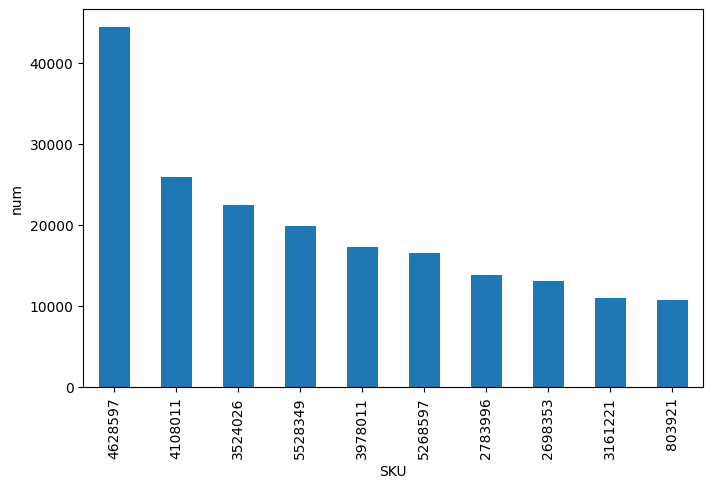

In [4]:
# different unique SKU
print("num of unique SKU:", len(df["SKU"].unique()))

# distribution of top 10 counts of each SKU
plt.figure(dpi=100,figsize=(8,5))
SKU_count = df["SKU"].value_counts().head(10)
ax = SKU_count.plot(kind = 'bar')
plt.xlabel("SKU")
plt.ylabel("num")

### STORE

num of unique Store: 330


Text(0, 0.5, 'num')

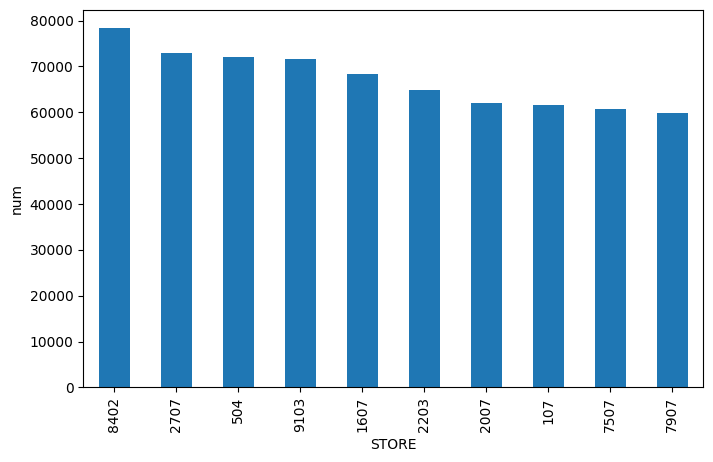

In [5]:
# different unique SKU
print("num of unique Store:", len(df["STORE"].unique()))

# distribution of top 10 counts of each Store
plt.figure(dpi=100,figsize=(8,5))
Store_count = df["STORE"].value_counts().head(10)
ax = Store_count.plot(kind = 'bar')
plt.xlabel("STORE")
plt.ylabel("num")

### REGISTER

In [6]:
# different unique register num
print("num of unique register num:", len(df["REGISTER"].unique()))

num of unique register num: 298


### TRANNUM

In [7]:
# different unique transaction num
print("num of unique transaction num:", len(df["TRANNUM"].unique()))

num of unique transaction num: 2681


### SEQ

In [8]:
# different unique sequence num
print("num of unique sequence num:", len(df["SEQ"].unique()))

num of unique sequence num: 2212517


### SALEDATE

In [9]:
# range
print("min date in:" + str(min(df["SALEDATE"])))
print("max date:" + str(max(df["SALEDATE"])))

# convert to datetime
df["SALEDATE"] = pd.to_datetime(df["SALEDATE"])

min date in:2004-08-01
max date:2005-08-27


<Axes: xlabel='SALEDATE'>

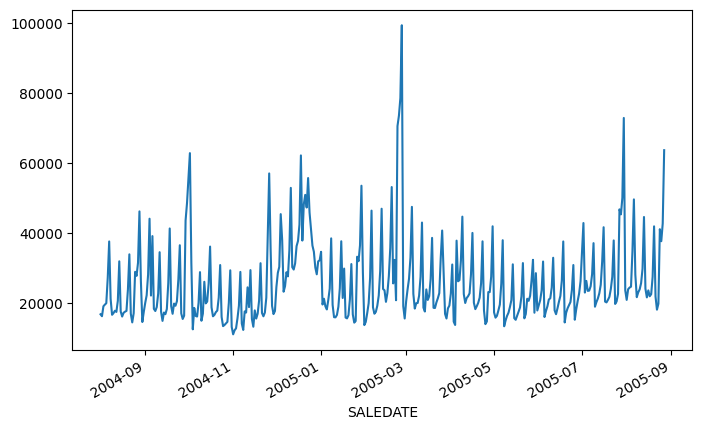

In [10]:
date_counts = df["SALEDATE"].value_counts()
plt.figure(dpi=100,figsize=(8,5))
date_counts.plot()

### STYPE

In [11]:
print("propotion of purchases: ", len(df[df["STYPE"]=="P"])/len(df))
print("propotion of returns: ", len(df[df["STYPE"]=="R"])/len(df))

propotion of purchases:  0.9233378
propotion of returns:  0.0766622


### QUANTITY

In [12]:
check_all_1 = (df['QUANTITY'] == 1).all()
check_all_1

True

In the sample 10000000 rows, the column quantity are all 1

### ORGPRICE

In [13]:
print("max orginal price:", df["ORGPRICE"].max())
print("min orginal price:", df["ORGPRICE"].min())

max orginal price: 1350.0
min orginal price: 0.0


Text(0.5, 0, 'log of orginal price')

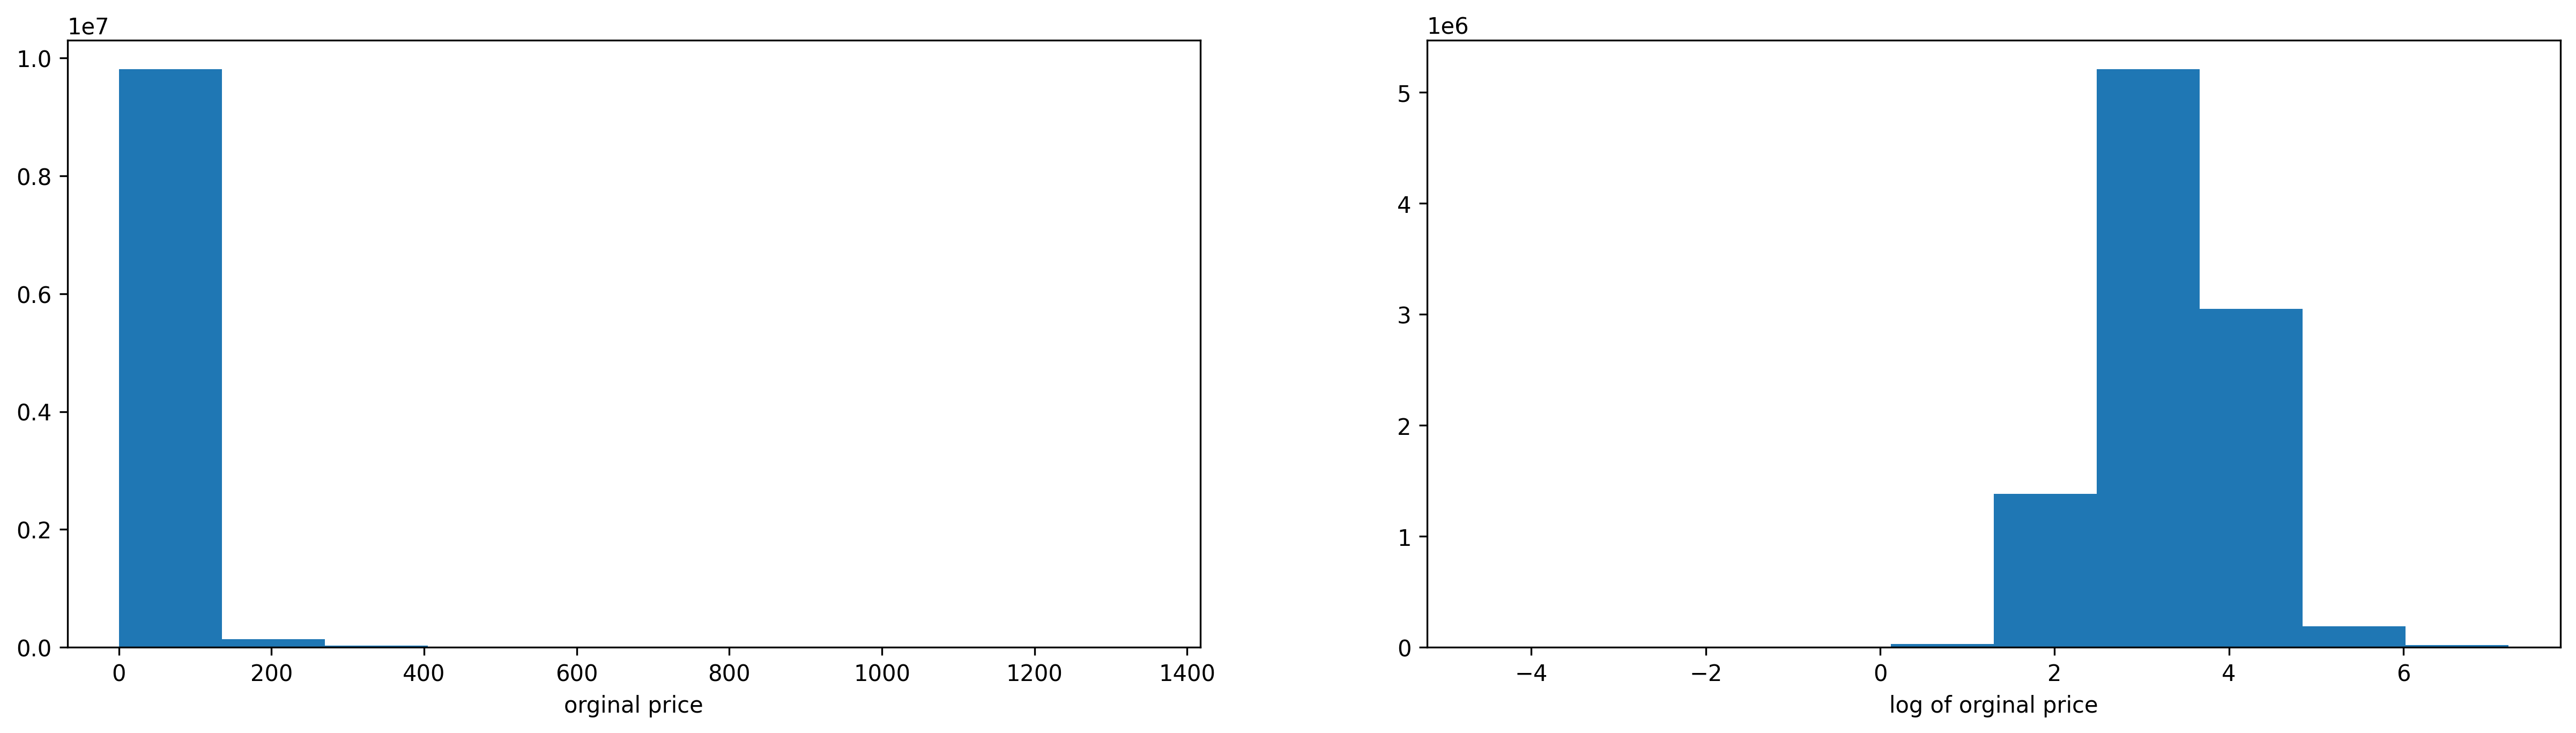

In [14]:
# distributon of original price
plt.figure(dpi=300,figsize=(20,5))
# without log
plt.subplot(121)
plt.hist(df["ORGPRICE"])
plt.xlabel("orginal price")

# with log
plt.subplot(122)
plt.hist(np.log(df[df["ORGPRICE"]!=0]["ORGPRICE"]))
plt.xlabel("log of orginal price")

In [15]:
# aggregate the table by salse date
df_date = pd.pivot_table(df,
                          values = ["QUANTITY", "ORGPRICE", 'SPRICE', "AMT"],
                          index = ['SALEDATE'], 
                          aggfunc = {'QUANTITY': 'sum',
                                     'SPRICE':'sum',
                                     'ORGPRICE': 'sum'}).reset_index()

<Axes: title={'center': 'ORGPRICE'}, xlabel='SALEDATE'>

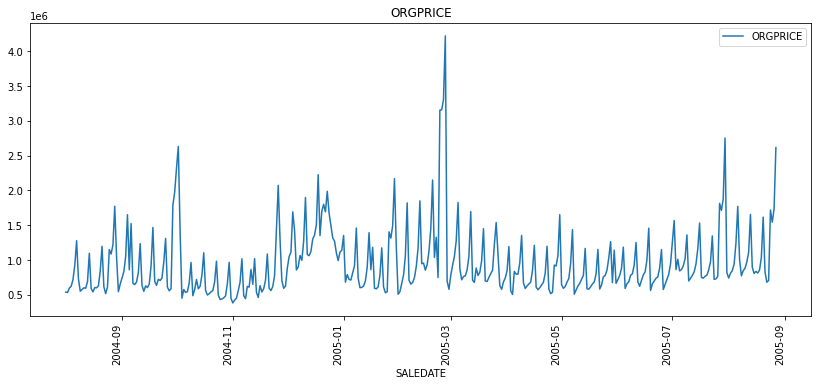

In [16]:
# The overall original price over sales date
df_date.plot.line(x = "SALEDATE", y = "ORGPRICE", figsize = (14,6),
                  title = "ORGPRICE", rot = 90)

In [18]:
# aggregate the table by store date
df_store = pd.pivot_table(df,
                          values = ["QUANTITY", "ORGPRICE", "SPRICE", "AMT"],
                          index = ['STORE'], 
                          aggfunc = {'QUANTITY': 'sum',
                                     'SPRICE':'sum',
                                     'ORGPRICE': 'sum'}).reset_index()

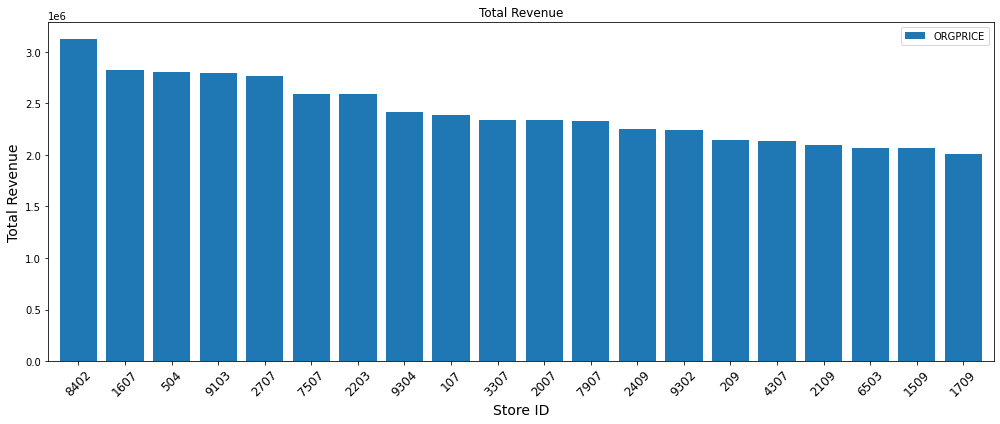

In [19]:
# Top 20 highest value stock in store
import matplotlib.pyplot as plt

bar_plot = df_store.sort_values('ORGPRICE', ascending=False).head(20).plot.bar(x="STORE", y="ORGPRICE", title="Total Revenue", rot=45, width=0.8,figsize=(14, 6))

# Customize the x-axis label rotation and font size
plt.xticks(rotation=45, fontsize=12)

# Add labels to the axes
plt.xlabel("Store ID", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensures labels and ticks fit within the figure
plt.show()

### SPRICE

In [20]:
print("max sales price:", df["SPRICE"].max())
print("min sales price:", df["SPRICE"].min())

max sales price: 1200.0
min sales price: 0.0


Text(0.5, 0, 'log of sales price')

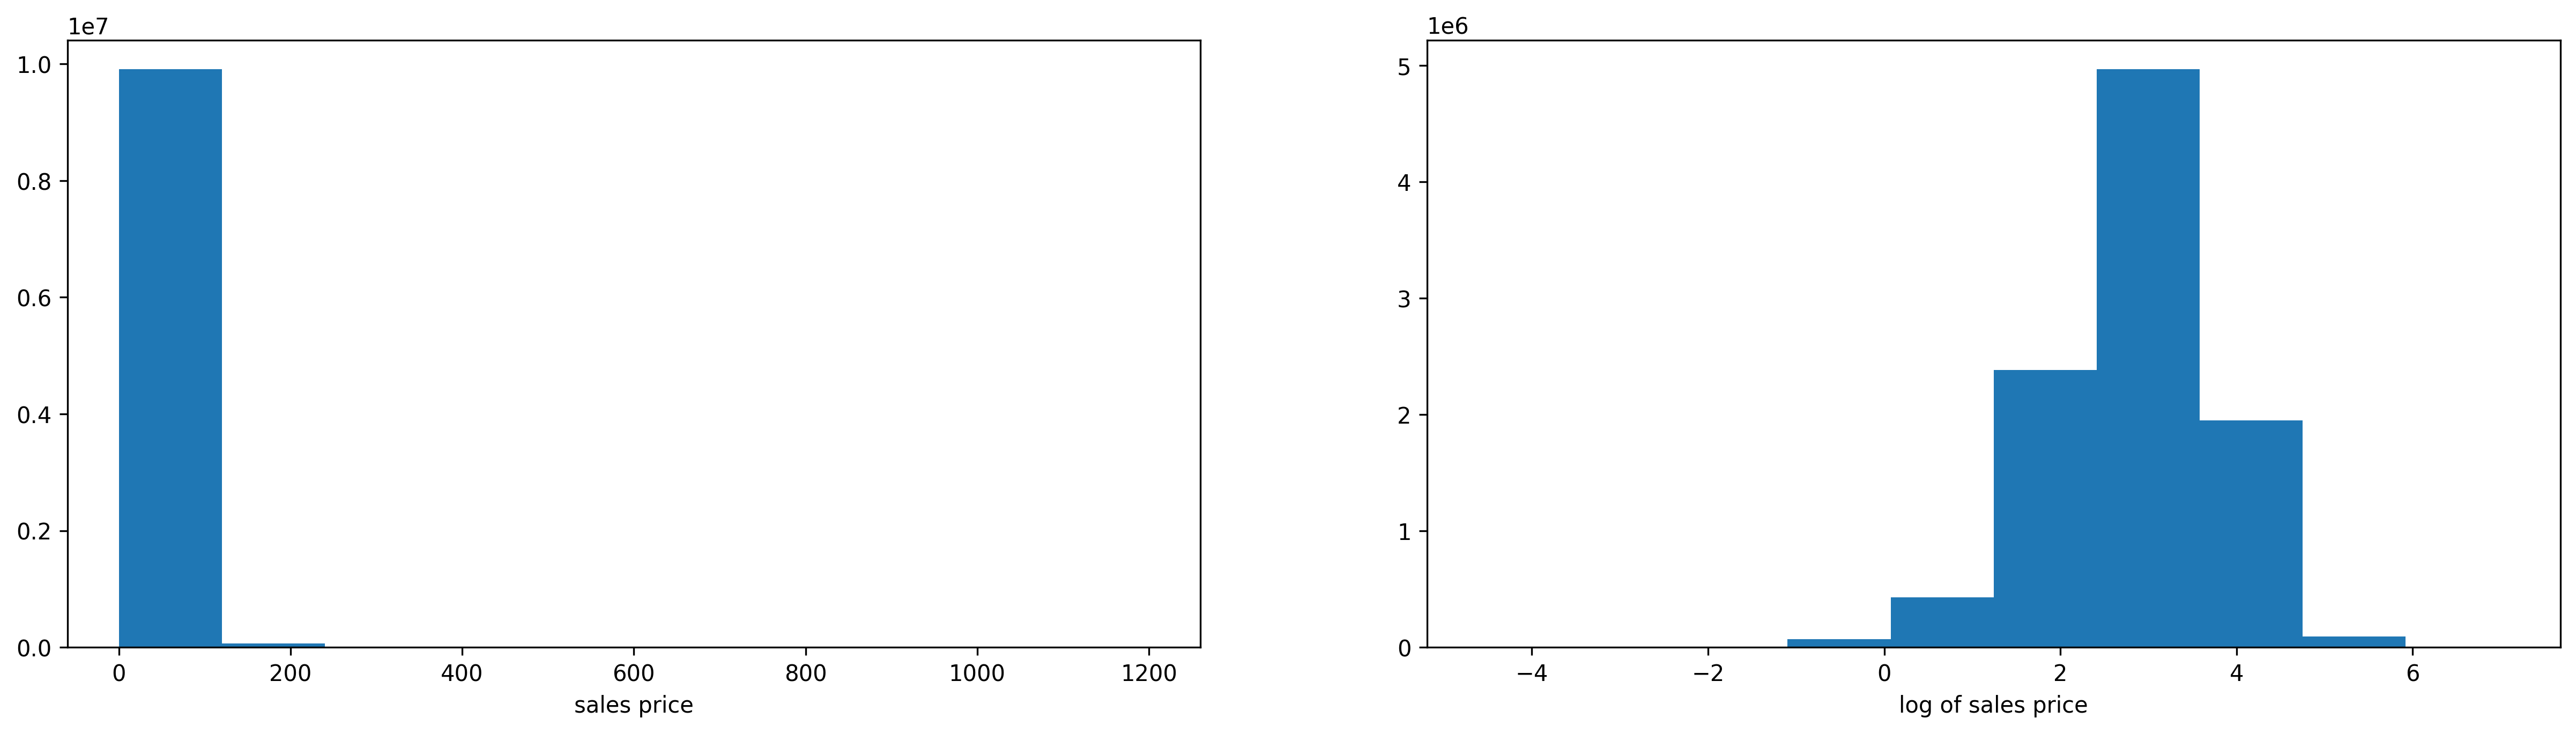

In [21]:
# distributon of original price
plt.figure(dpi=300,figsize=(20,5))
# without log
plt.subplot(121)
plt.hist(df["SPRICE"])
plt.xlabel("sales price")

# with log
plt.subplot(122)
plt.hist(np.log(df[df["SPRICE"]!=0]["SPRICE"]))
plt.xlabel("log of sales price")

<Axes: title={'center': 'SPRICE'}, xlabel='SALEDATE'>

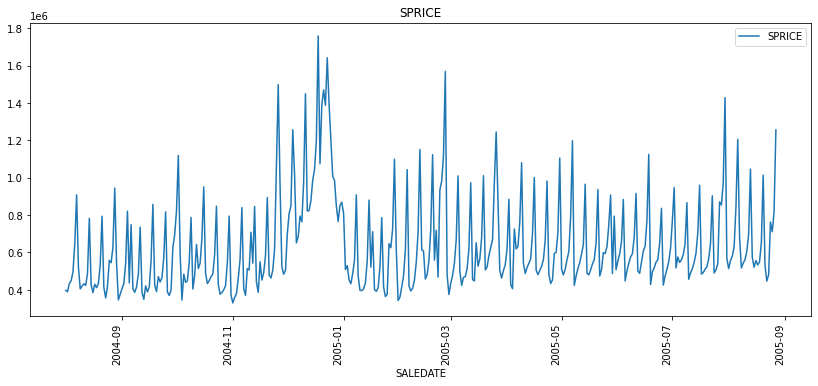

In [23]:
# The overall original price over sales date
df_date.plot.line(x = "SALEDATE", y = "SPRICE", figsize = (14,6),
                  title = "SPRICE", rot = 90)

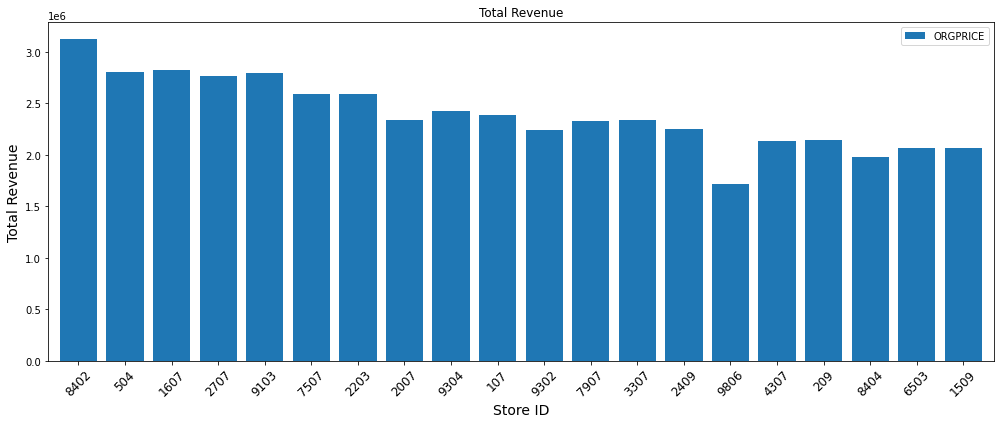

In [24]:
# Top 20 highest value stock in store
bar_plot = df_store.sort_values('SPRICE', ascending=False).head(20).plot.bar(x="STORE", y="ORGPRICE", title="Total Revenue", rot=45, width=0.8,figsize=(14, 6))

# Customize the x-axis label rotation and font size
plt.xticks(rotation=45, fontsize=12)

# Add labels to the axes
plt.xlabel("Store ID", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensures labels and ticks fit within the figure
plt.show()

### ORGPRICE vs SPRICE

In [25]:
print("num of original<true:",len(df[df["ORGPRICE"]<df["SPRICE"]])/len(df))
print("num of original=true:",len(df[df["ORGPRICE"]==df["SPRICE"]])/len(df))
print("num of original>true:",len(df[df["ORGPRICE"]>df["SPRICE"]])/len(df))

# Correlation
print("corelation:", np.corrcoef(df["ORGPRICE"],df["SPRICE"])[0][1])

num of original<true: 0.0023864
num of original=true: 0.4727952
num of original>true: 0.5248184
corelation: 0.804493814405535


Text(0, 0.5, 'sales price')

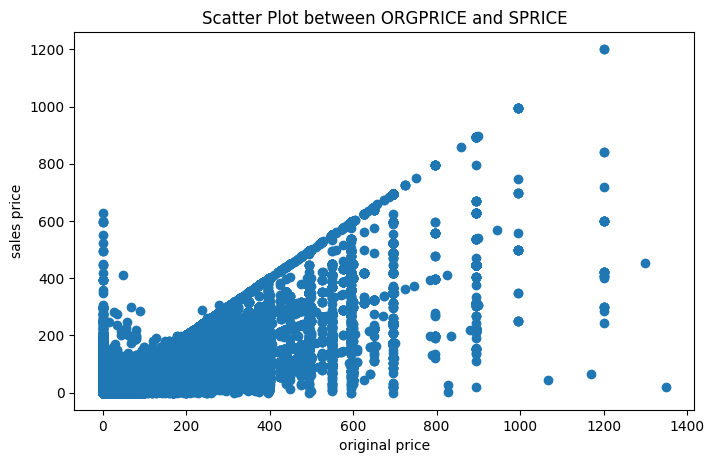

In [26]:
# scatter plot
plt.figure(dpi=100,figsize=(8,5))
plt.scatter(df["ORGPRICE"],df["SPRICE"])
plt.title('Scatter Plot between ORGPRICE and SPRICE')
plt.xlabel("original price")
plt.ylabel("sales price")

### AMT

In [27]:
(df["AMT"] == df["SPRICE"]).all()

True

AMT all equal to SPRICE

### INTERID

In [28]:
# different unique inter ID
print("num of unique Internal Id:", len(df["INTERID"].unique()))

num of unique Internal Id: 2050712


### MIC

In [29]:
# different unique MIC
print("num of unique Master Item Code:", len(df["MIC"].unique()))

num of unique Master Item Code: 821
